In [49]:
from util.experiment_setup import load_model, load_dataset, setup_dataset_transforms
from util.files import find_files_in_folder
from util.training import validate
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import os.path as osp

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


In [51]:
files_ = find_files_in_folder("../models/bg_transform/", ".cfg")

In [52]:
model_paths = [f[:-4] for f in files_]

In [53]:
test_scales = [0.1,0.2,0.3,0.4,0.5,0.65,0.8,0.9,1,1.1,1.2,1.5,2,2.5,3,3.5,3.7]
accuracies = []
test_data = load_dataset(train_data=False, test_data=True, enable_img_transforms=True, min_resize=test_scales[0], max_resize=test_scales[0])
for model_path in model_paths:
    model = load_model(model_path)
    model.to(device)
    model_accs = []
    for scale in tqdm(test_scales):
        transforms = setup_dataset_transforms(enable_img_transforms=True, min_resize=scale, max_resize=scale)
        test_data.transform = transforms
        test_loader = DataLoader(test_data, batch_size=256, shuffle=False)
        model_accs.append(validate(model, test_loader, device, abort_batch=1))
    accuracies.append(model_accs)

Files already downloaded and verified


2it [00:00,  4.54it/s][00:00<?, ?it/s]
2it [00:00,  4.01it/s][00:00<00:07,  2.18it/s]
2it [00:00,  4.37it/s][00:00<00:07,  2.06it/s]
2it [00:00,  4.36it/s][00:01<00:06,  2.10it/s]
2it [00:00,  4.71it/s][00:01<00:06,  2.12it/s]
2it [00:00,  4.63it/s][00:02<00:05,  2.19it/s]
2it [00:00,  3.94it/s][00:02<00:04,  2.22it/s]
2it [00:00,  3.82it/s][00:03<00:04,  2.12it/s]
2it [00:00,  4.91it/s][00:03<00:04,  2.04it/s]
2it [00:00,  3.32it/s][00:04<00:03,  2.15it/s]
2it [00:00,  4.13it/s] [00:04<00:03,  1.96it/s]
2it [00:00,  4.13it/s] [00:05<00:03,  1.99it/s]
2it [00:00,  4.15it/s] [00:05<00:02,  2.00it/s]
2it [00:00,  2.99it/s] [00:06<00:01,  2.02it/s]
2it [00:00,  3.23it/s] [00:06<00:01,  1.82it/s]
2it [00:00,  3.35it/s] [00:07<00:01,  1.75it/s]
2it [00:00,  2.38it/s] [00:08<00:00,  1.72it/s]
100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
2it [00:00,  4.50it/s][00:00<?, ?it/s]
2it [00:00,  4.32it/s][00:00<00:07,  2.21it/s]
2it [00:00,  3.24it/s][00:00<00:06,  2.17it/s]
2it [00:00,  4.67it/s

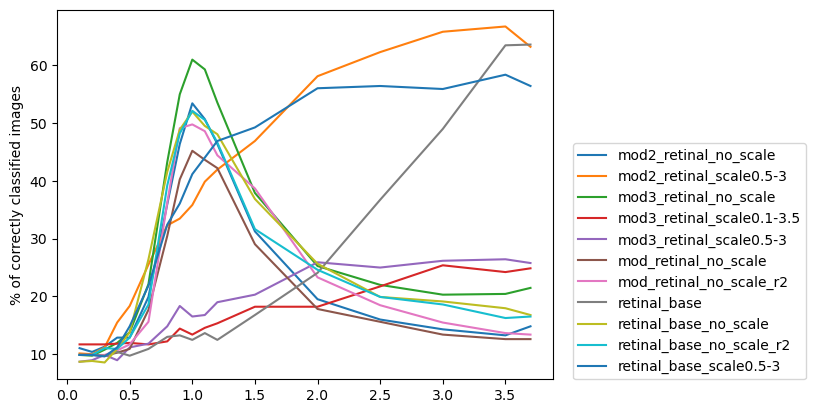

In [54]:
plt.plot(test_scales, np.array(accuracies).T)
plt.legend([osp.split(model_path)[1] for model_path in model_paths], loc=(1.04, 0))
plt.ylabel("% of correctly classified images")
plt.xlabel("")
plt.show()